In [232]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
import os

In [233]:
train_data = pd.read_csv('../all (1)/training.csv')  
test_data = pd.read_csv('../all (1)/test.csv')
lookid_data = pd.read_csv('../all (1)/IdLookupTable.csv')
os.listdir('../all (1)')

['.ipynb_checkpoints',
 'face_key_detection_submission.csv',
 'haarcascade_frontalface_default.xml',
 'IdLookupTable.csv',
 'SampleSubmission.csv',
 'test.csv',
 'training.csv',
 'Untitled.ipynb']

In [234]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [235]:
train_data.shape

(7049, 31)

In [240]:
def format_img(string):
    return np.asarray([int(item) for item in string.split()], dtype=np.uint8).reshape(96, 96)

def plot_faces(nrows=5, ncols=5):
    selection = np.random.choice(train_data.index, size=(nrows*ncols), replace=False)
    image_strings = train_data.loc[selection]['Image']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(string2image(string), 'gray')
        ax.axis('off')

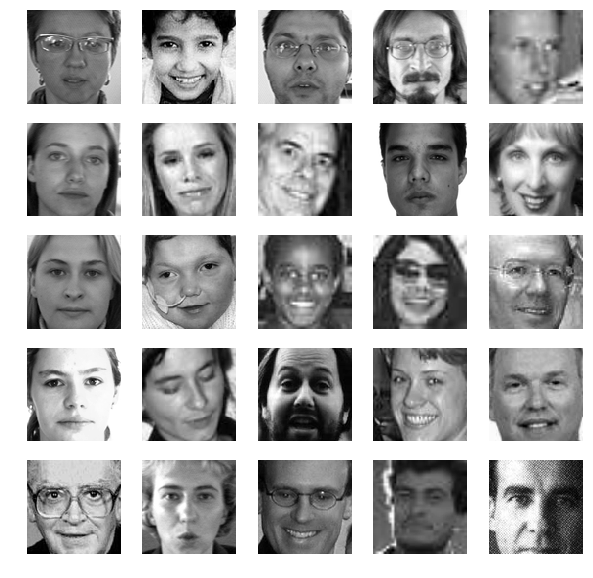

In [241]:
plot_faces()

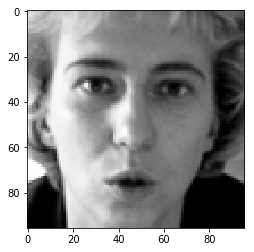

In [242]:
img = format_img(train_data.iloc[1]['Image'])
plt.imshow(img,cmap='gray')

In [243]:
RGB = format_img(train_data.iloc[1]['Image'])
cv2.imshow('gray', RGB)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [183]:
img.shape

(96, 96)

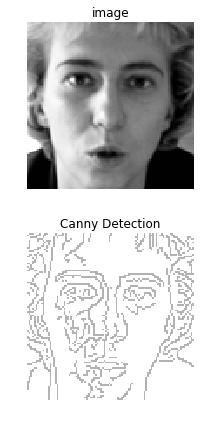

In [244]:
edges = cv2.Canny(img, 50, 100)

plt.figure(figsize=(7, 6))
plt.subplot(2, 1, 1)
plt.imshow(img, cmap="gray")
plt.title("image")
plt.axis('off')
plt.subplot(2, 1, 2)
plt.imshow(edges, cmap="Greys", alpha=0.3)
plt.axis('off')
plt.title("Canny Detection")
plt.tight_layout()
plt.show()

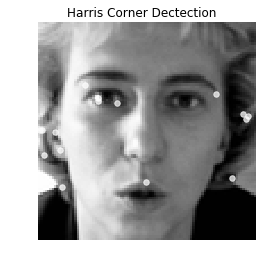

In [245]:
dst = cv2.cornerHarris(img, 2, 3, 0.24)
ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)
x, y = np.nonzero(dst)
plt.title("Harris Corner Dectection")
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.scatter(y, x, s=30, c="w", alpha=0.7)
plt.show()

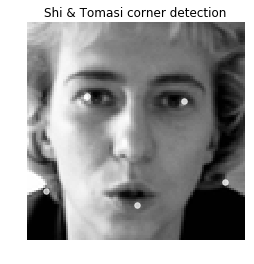

In [246]:
corners = cv2.goodFeaturesToTrack(img, 100, 0.001, 40)
corners = np.int0(corners)
plt.title("Shi & Tomasi corner detection")
plt.axis("off")
plt.imshow(img, cmap="gray")
plt.scatter(corners[:, 0, 0], corners[:, 0, 1], s=30, c="w", alpha=0.7)
plt.show()

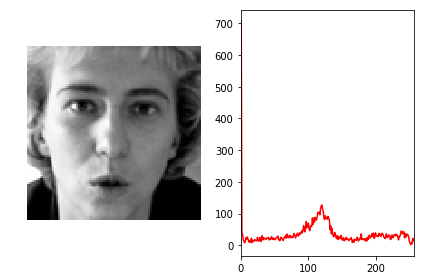

In [247]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.subplot(122)
plt.plot(hist, color='r')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()

In [248]:
dst = cv2.cornerHarris(img, 2, 3, 0.24)
ret, dst = cv2.threshold(dst, 0.001 * dst.max(), 1, 0)

In [249]:
keypoint_cols = list(train_data.columns)[:-1]

In [252]:
xy = train_data.iloc[1][keypoint_cols].values.reshape((15, 2))
xy.shape

(15, 2)

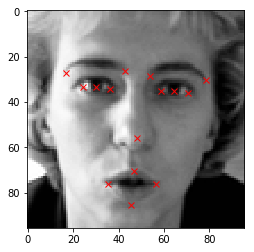

In [253]:
plt.plot(xy[:, 0], xy[:, 1], 'x', color = 'red')
plt.imshow(format_img(train_data.iloc[1]['Image']), cmap='gray')

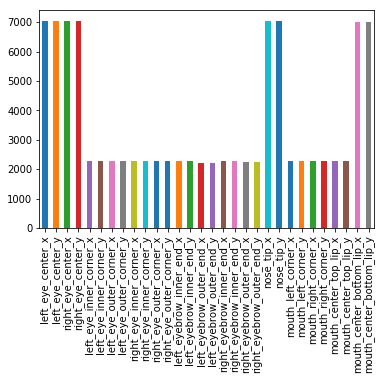

In [259]:
train_data.describe().loc['count'].plot.bar()

In [255]:
y = train_data.iloc[:, :-1].values
y.shape

(7049, 30)

In [256]:
y[1,:]

array([64.33293617, 34.9700766 , 29.9492766 , 33.44871489, 58.85617021,
       35.27434894, 70.7227234 , 36.18716596, 36.0347234 , 34.36153191,
       24.47251064, 33.14444255, 53.98740426, 28.27594894, 78.63421277,
       30.4059234 , 42.72885106, 26.14604255, 16.8653617 , 27.05885957,
       48.20629787, 55.66093617, 56.42144681, 76.352     , 35.12238298,
       76.04765957, 46.68459574, 70.26655319, 45.46791489, 85.48017021])

In [260]:
train_data.shape

(7049, 31)

In [262]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64

In [263]:
train_data.fillna(method = 'ffill',inplace = True)

In [264]:
train_data.isnull().any().value_counts()

False    31
dtype: int64

In [278]:
x = np.stack([format_img(string) for string in train_data['Image']])[..., None]
x

array([[[[238],
         [236],
         [237],
         ...,
         [250],
         [250],
         [250]],

        [[235],
         [238],
         [236],
         ...,
         [249],
         [250],
         [251]],

        [[237],
         [236],
         [237],
         ...,
         [251],
         [251],
         [250]],

        ...,

        [[186],
         [183],
         [181],
         ...,
         [ 52],
         [ 57],
         [ 60]],

        [[189],
         [188],
         [207],
         ...,
         [ 61],
         [ 69],
         [ 78]],

        [[191],
         [184],
         [184],
         ...,
         [ 70],
         [ 75],
         [ 90]]],


       [[[219],
         [215],
         [204],
         ...,
         [ 92],
         [ 88],
         [ 84]],

        [[222],
         [219],
         [220],
         ...,
         [ 92],
         [ 88],
         [ 86]],

        [[231],
         [224],
         [212],
         ...,
         [ 77],
         [

In [277]:
y = np.vstack(train_data[train_data.columns[:-1]].values)
y

array([[66.03356391, 39.00227368, 30.22700752, ..., 72.93545865,
        43.13070677, 84.48577444],
       [64.33293617, 34.9700766 , 29.9492766 , ..., 70.26655319,
        45.46791489, 85.48017021],
       [65.05705263, 34.90964211, 30.90378947, ..., 70.19178947,
        47.27494737, 78.65936842],
       ...,
       [66.69073171, 36.84522146, 31.66641951, ..., 75.96359236,
        49.46257171, 78.11712   ],
       [70.96508235, 39.85366588, 30.54328471, ..., 75.96359236,
        50.06518588, 79.58644706],
       [66.93831111, 43.42450963, 31.09605926, ..., 75.96359236,
        45.90048   , 82.7730963 ]])

In [279]:
x.shape, x.dtype

((7049, 96, 96, 1), dtype('uint8'))

In [280]:
y.shape, y.dtype

((7049, 30), dtype('float64'))

In [281]:
test_data.shape

(1783, 2)

In [286]:
training = train_data.drop('Image',axis = 1)

X_train = x / 255
y_train = []

for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

In [287]:
from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

model = Sequential([Flatten(input_shape=(96,96)),
                         Dense(500, activation="relu"),
                         Dropout(0.2),
                         Dense(90, activation="relu"),
                         Dense(30)
                         ])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae','accuracy'])

In [289]:
model.fit(X_train,y_train,epochs = 500,batch_size = 128,validation_split = 0.2)

Train on 5639 samples, validate on 1410 samples
Epoch 1/500
5639/5639 [==============================] - 7s 1ms/step - loss: 32381.3985 - mean_absolute_error: 89.6049 - acc: 0.0122 - val_loss: 2710.4986 - val_mean_absolute_error: 48.5378 - val_acc: 0.0000e+00
Epoch 2/500
5639/5639 [==============================] - 6s 1ms/step - loss: 2726.8712 - mean_absolute_error: 48.3177 - acc: 5.3201e-04 - val_loss: 2708.2566 - val_mean_absolute_error: 48.5161 - val_acc: 0.0000e+00
Epoch 3/500
5639/5639 [==============================] - 6s 1ms/step - loss: 2685.5954 - mean_absolute_error: 48.1646 - acc: 0.0000e+00 - val_loss: 2705.6442 - val_mean_absolute_error: 48.4909 - val_acc: 0.0000e+00
Epoch 4/500
5639/5639 [==============================] - 6s 977us/step - loss: 2677.5308 - mean_absolute_error: 48.1119 - acc: 1.7734e-04 - val_loss: 2702.7935 - val_mean_absolute_error: 48.4633 - val_acc: 0.0000e+00
Epoch 5/500
5639/5639 [==============================] - 5s 962us/step - loss: 2670.8579 - me

Epoch 39/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2531.3675 - mean_absolute_error: 46.7210 - acc: 0.0012 - val_loss: 2570.4784 - val_mean_absolute_error: 47.1214 - val_acc: 7.0922e-04
Epoch 40/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2527.6850 - mean_absolute_error: 46.6803 - acc: 0.0012 - val_loss: 2566.4512 - val_mean_absolute_error: 47.0793 - val_acc: 7.0922e-04
Epoch 41/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2530.3809 - mean_absolute_error: 46.6597 - acc: 0.0012 - val_loss: 2562.4209 - val_mean_absolute_error: 47.0371 - val_acc: 7.0922e-04
Epoch 42/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2519.4842 - mean_absolute_error: 46.5955 - acc: 0.0012 - val_loss: 2558.3883 - val_mean_absolute_error: 46.9949 - val_acc: 7.0922e-04
Epoch 43/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2517.6149 - mean_absolute_error: 46.5636 - acc: 0.0012 - val_loss: 2554.35

5639/5639 [==============================] - 10s 2ms/step - loss: 2379.8161 - mean_absolute_error: 45.0873 - acc: 0.0012 - val_loss: 2417.5305 - val_mean_absolute_error: 45.4861 - val_acc: 7.0922e-04
Epoch 78/500
5639/5639 [==============================] - 8s 1ms/step - loss: 2375.8628 - mean_absolute_error: 45.0437 - acc: 0.0012 - val_loss: 2413.5420 - val_mean_absolute_error: 45.4425 - val_acc: 7.0922e-04
Epoch 79/500
5639/5639 [==============================] - 8s 1ms/step - loss: 2371.9140 - mean_absolute_error: 45.0001 - acc: 0.0012 - val_loss: 2409.5582 - val_mean_absolute_error: 45.3990 - val_acc: 7.0922e-04
Epoch 80/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2367.9694 - mean_absolute_error: 44.9566 - acc: 0.0012 - val_loss: 2405.5779 - val_mean_absolute_error: 45.3554 - val_acc: 7.0922e-04
Epoch 81/500
5639/5639 [==============================] - 10s 2ms/step - loss: 2364.2933 - mean_absolute_error: 44.9145 - acc: 0.0012 - val_loss: 2401.5995 - val_me

5639/5639 [==============================] - 6s 1ms/step - loss: 2231.9728 - mean_absolute_error: 43.4267 - acc: 0.0012 - val_loss: 2268.3950 - val_mean_absolute_error: 43.8259 - val_acc: 7.0922e-04
Epoch 116/500
5639/5639 [==============================] - 6s 1ms/step - loss: 2228.2926 - mean_absolute_error: 43.3836 - acc: 0.0012 - val_loss: 2264.5403 - val_mean_absolute_error: 43.7821 - val_acc: 7.0922e-04
Epoch 117/500
5639/5639 [==============================] - 6s 1ms/step - loss: 2224.3873 - mean_absolute_error: 43.3397 - acc: 0.0012 - val_loss: 2260.6899 - val_mean_absolute_error: 43.7384 - val_acc: 7.0922e-04
Epoch 118/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2220.5766 - mean_absolute_error: 43.2959 - acc: 0.0012 - val_loss: 2256.8446 - val_mean_absolute_error: 43.6947 - val_acc: 7.0922e-04
Epoch 119/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2217.7757 - mean_absolute_error: 43.2569 - acc: 0.0012 - val_loss: 2253.0037 - val_

5639/5639 [==============================] - 8s 1ms/step - loss: 2091.2342 - mean_absolute_error: 41.7736 - acc: 0.0012 - val_loss: 2124.6741 - val_mean_absolute_error: 42.1640 - val_acc: 7.0922e-04
Epoch 154/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2086.5950 - mean_absolute_error: 41.7249 - acc: 0.0012 - val_loss: 2120.9684 - val_mean_absolute_error: 42.1203 - val_acc: 7.0922e-04
Epoch 155/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2093.0088 - mean_absolute_error: 41.7160 - acc: 0.0012 - val_loss: 2117.2663 - val_mean_absolute_error: 42.0766 - val_acc: 7.0922e-04
Epoch 156/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2111.8568 - mean_absolute_error: 41.7481 - acc: 0.0012 - val_loss: 2113.5697 - val_mean_absolute_error: 42.0329 - val_acc: 7.0922e-04
Epoch 157/500
5639/5639 [==============================] - 7s 1ms/step - loss: 2086.6481 - mean_absolute_error: 41.6374 - acc: 0.0014 - val_loss: 2109.8769 - val_

5639/5639 [==============================] - 7s 1ms/step - loss: 1952.8910 - mean_absolute_error: 40.1059 - acc: 0.0012 - val_loss: 1986.5951 - val_mean_absolute_error: 40.5045 - val_acc: 7.0922e-04
Epoch 192/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1949.3677 - mean_absolute_error: 40.0622 - acc: 0.0012 - val_loss: 1983.0373 - val_mean_absolute_error: 40.4609 - val_acc: 7.0922e-04
Epoch 193/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1945.8491 - mean_absolute_error: 40.0186 - acc: 0.0012 - val_loss: 1979.4827 - val_mean_absolute_error: 40.4172 - val_acc: 7.0922e-04
Epoch 194/500
5639/5639 [==============================] - 8s 1ms/step - loss: 1942.7507 - mean_absolute_error: 39.9776 - acc: 0.0012 - val_loss: 1975.9332 - val_mean_absolute_error: 40.3736 - val_acc: 7.0922e-04
Epoch 195/500
5639/5639 [==============================] - 9s 2ms/step - loss: 1938.8246 - mean_absolute_error: 39.9314 - acc: 0.0012 - val_loss: 1972.3882 - val_

5639/5639 [==============================] - 7s 1ms/step - loss: 1821.8024 - mean_absolute_error: 38.4501 - acc: 0.0012 - val_loss: 1854.1737 - val_mean_absolute_error: 38.8484 - val_acc: 7.0922e-04
Epoch 230/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1818.4285 - mean_absolute_error: 38.4066 - acc: 0.0012 - val_loss: 1850.7644 - val_mean_absolute_error: 38.8048 - val_acc: 7.0922e-04
Epoch 231/500
5639/5639 [==============================] - 8s 1ms/step - loss: 1815.0597 - mean_absolute_error: 38.3631 - acc: 0.0012 - val_loss: 1847.3605 - val_mean_absolute_error: 38.7613 - val_acc: 7.0922e-04
Epoch 232/500
5639/5639 [==============================] - 8s 1ms/step - loss: 1811.6952 - mean_absolute_error: 38.3196 - acc: 0.0012 - val_loss: 1843.9609 - val_mean_absolute_error: 38.7178 - val_acc: 7.0922e-04
Epoch 233/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1808.3343 - mean_absolute_error: 38.2761 - acc: 0.0012 - val_loss: 1840.5652 - val_

5639/5639 [==============================] - 6s 1ms/step - loss: 1696.3593 - mean_absolute_error: 36.7993 - acc: 0.0012 - val_loss: 1727.3968 - val_mean_absolute_error: 37.1965 - val_acc: 7.0922e-04
Epoch 268/500
5639/5639 [==============================] - 6s 1ms/step - loss: 1693.1339 - mean_absolute_error: 36.7559 - acc: 0.0012 - val_loss: 1724.1362 - val_mean_absolute_error: 37.1531 - val_acc: 7.0922e-04
Epoch 269/500
5639/5639 [==============================] - 6s 1ms/step - loss: 1689.9130 - mean_absolute_error: 36.7126 - acc: 0.0012 - val_loss: 1720.8803 - val_mean_absolute_error: 37.1097 - val_acc: 7.0922e-04
Epoch 270/500
5639/5639 [==============================] - 8s 1ms/step - loss: 1687.5906 - mean_absolute_error: 36.6748 - acc: 0.0012 - val_loss: 1717.6275 - val_mean_absolute_error: 37.0663 - val_acc: 7.0922e-04
Epoch 271/500
5639/5639 [==============================] - 8s 1ms/step - loss: 1708.0605 - mean_absolute_error: 36.6774 - acc: 0.0012 - val_loss: 1714.3783 - val_

5639/5639 [==============================] - 8s 2ms/step - loss: 1576.5431 - mean_absolute_error: 35.1553 - acc: 0.0012 - val_loss: 1606.2477 - val_mean_absolute_error: 35.5499 - val_acc: 7.0922e-04
Epoch 306/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1573.4656 - mean_absolute_error: 35.1122 - acc: 0.0012 - val_loss: 1603.1351 - val_mean_absolute_error: 35.5067 - val_acc: 7.0922e-04
Epoch 307/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1570.3925 - mean_absolute_error: 35.0691 - acc: 0.0012 - val_loss: 1600.0264 - val_mean_absolute_error: 35.4634 - val_acc: 7.0922e-04
Epoch 308/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1567.3227 - mean_absolute_error: 35.0259 - acc: 0.0012 - val_loss: 1596.9220 - val_mean_absolute_error: 35.4202 - val_acc: 7.0922e-04
Epoch 309/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1564.2569 - mean_absolute_error: 34.9828 - acc: 0.0012 - val_loss: 1593.8210 - val_

5639/5639 [==============================] - 7s 1ms/step - loss: 1462.3298 - mean_absolute_error: 33.5211 - acc: 0.0012 - val_loss: 1490.6992 - val_mean_absolute_error: 33.9103 - val_acc: 7.0922e-04
Epoch 344/500
5639/5639 [==============================] - 9s 2ms/step - loss: 1459.3985 - mean_absolute_error: 33.4782 - acc: 0.0012 - val_loss: 1487.7333 - val_mean_absolute_error: 33.8673 - val_acc: 7.0922e-04
Epoch 345/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1456.4719 - mean_absolute_error: 33.4354 - acc: 0.0012 - val_loss: 1484.7721 - val_mean_absolute_error: 33.8243 - val_acc: 7.0922e-04
Epoch 346/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1453.5493 - mean_absolute_error: 33.3926 - acc: 0.0012 - val_loss: 1481.8136 - val_mean_absolute_error: 33.7812 - val_acc: 7.0922e-04
Epoch 347/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1450.6298 - mean_absolute_error: 33.3498 - acc: 0.0012 - val_loss: 1478.8601 - val_

5639/5639 [==============================] - 7s 1ms/step - loss: 1353.6853 - mean_absolute_error: 31.9000 - acc: 0.0012 - val_loss: 1380.7176 - val_mean_absolute_error: 32.2812 - val_acc: 7.0922e-04
Epoch 382/500
5639/5639 [==============================] - 8s 1ms/step - loss: 1350.9008 - mean_absolute_error: 31.8575 - acc: 0.0012 - val_loss: 1377.8983 - val_mean_absolute_error: 32.2385 - val_acc: 7.0922e-04
Epoch 383/500
5639/5639 [==============================] - 8s 1ms/step - loss: 1348.1205 - mean_absolute_error: 31.8150 - acc: 0.0012 - val_loss: 1375.0826 - val_mean_absolute_error: 32.1958 - val_acc: 7.0922e-04
Epoch 384/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1345.3432 - mean_absolute_error: 31.7726 - acc: 0.0012 - val_loss: 1372.2699 - val_mean_absolute_error: 32.1531 - val_acc: 7.0922e-04
Epoch 385/500
5639/5639 [==============================] - 6s 1ms/step - loss: 1342.5699 - mean_absolute_error: 31.7302 - acc: 0.0012 - val_loss: 1369.4617 - val_

5639/5639 [==============================] - 6s 1ms/step - loss: 1250.5540 - mean_absolute_error: 30.2986 - acc: 0.0012 - val_loss: 1276.2418 - val_mean_absolute_error: 30.6740 - val_acc: 7.0922e-04
Epoch 420/500
5639/5639 [==============================] - 6s 1ms/step - loss: 1247.9136 - mean_absolute_error: 30.2573 - acc: 0.0012 - val_loss: 1273.5662 - val_mean_absolute_error: 30.6330 - val_acc: 7.0922e-04
Epoch 421/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1245.2773 - mean_absolute_error: 30.2159 - acc: 0.0012 - val_loss: 1270.8940 - val_mean_absolute_error: 30.5918 - val_acc: 7.0922e-04
Epoch 422/500
5639/5639 [==============================] - 8s 2ms/step - loss: 1242.6450 - mean_absolute_error: 30.1746 - acc: 0.0012 - val_loss: 1268.2265 - val_mean_absolute_error: 30.5507 - val_acc: 7.0922e-04
Epoch 423/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1240.0156 - mean_absolute_error: 30.1332 - acc: 0.0012 - val_loss: 1265.5606 - val_

5639/5639 [==============================] - 6s 1ms/step - loss: 1152.8538 - mean_absolute_error: 28.7271 - acc: 0.0012 - val_loss: 1177.1846 - val_mean_absolute_error: 29.1050 - val_acc: 7.0922e-04
Epoch 458/500
5639/5639 [==============================] - 6s 1ms/step - loss: 1150.3565 - mean_absolute_error: 28.6858 - acc: 0.0012 - val_loss: 1174.6521 - val_mean_absolute_error: 29.0637 - val_acc: 7.0922e-04
Epoch 459/500
5639/5639 [==============================] - 8s 1ms/step - loss: 1147.8627 - mean_absolute_error: 28.6445 - acc: 0.0012 - val_loss: 1172.1224 - val_mean_absolute_error: 29.0223 - val_acc: 7.0922e-04
Epoch 460/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1145.3720 - mean_absolute_error: 28.6032 - acc: 0.0012 - val_loss: 1169.5948 - val_mean_absolute_error: 28.9810 - val_acc: 7.0922e-04
Epoch 461/500
5639/5639 [==============================] - 6s 1ms/step - loss: 1142.8856 - mean_absolute_error: 28.5619 - acc: 0.0012 - val_loss: 1167.0728 - val_

5639/5639 [==============================] - 7s 1ms/step - loss: 1060.5307 - mean_absolute_error: 27.1625 - acc: 0.0012 - val_loss: 1083.4995 - val_mean_absolute_error: 27.5358 - val_acc: 7.0922e-04
Epoch 496/500
5639/5639 [==============================] - 8s 1ms/step - loss: 1058.1731 - mean_absolute_error: 27.1215 - acc: 0.0012 - val_loss: 1081.1061 - val_mean_absolute_error: 27.4946 - val_acc: 7.0922e-04
Epoch 497/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1055.8186 - mean_absolute_error: 27.0805 - acc: 0.0012 - val_loss: 1078.7156 - val_mean_absolute_error: 27.4536 - val_acc: 7.0922e-04
Epoch 498/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1053.4689 - mean_absolute_error: 27.0396 - acc: 0.0012 - val_loss: 1076.3310 - val_mean_absolute_error: 27.4124 - val_acc: 7.0922e-04
Epoch 499/500
5639/5639 [==============================] - 7s 1ms/step - loss: 1051.1220 - mean_absolute_error: 26.9986 - acc: 0.0012 - val_loss: 1073.9473 - val_

In [294]:
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    
    timag.append(timg)

In [295]:
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1,96,96)

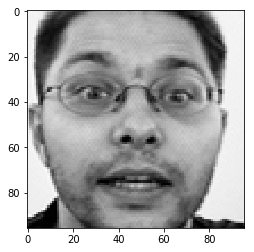

In [310]:
plt.imshow(X_test[0], 'gray')
plt.show()

In [297]:
pred = model.predict(X_test)

In [298]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)

In [299]:
rowid = lookid_data['RowId']
rowid=list(rowid)

In [300]:
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))

In [301]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [302]:
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)


In [311]:
submission.to_csv('face_detection_submission.csv',index = False)